Import the necessary code, set seed

In [ ]:
import numpy as np
from numpy import random
random.seed(398247)
print(random.rand())

Importing libraries and setting initial seed/values

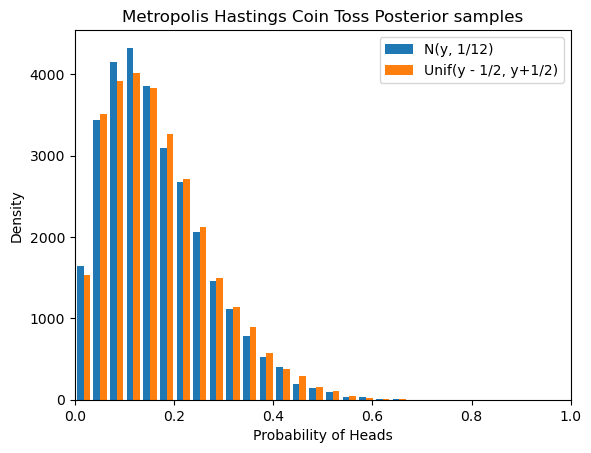

In [101]:
import numpy as np
from scipy.stats import binom
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1094375)

tosses = 10
prob_heads = np.random.rand()
heads = np.random.binomial(tosses, prob_heads)

def rho_accept(x, y, heads, tosses):
    if y < 0 or y > 1:
        return 0
    return min(binom.pmf(heads, tosses, y) / binom.pmf(heads, tosses, x), 1)


no_samples = 30000
init_sample = 0.5

norm_mh_samples = [init_sample]

for i in range(1, no_samples):
    last_sample = norm_mh_samples[i - 1]
    new_guess = np.random.normal(last_sample, np.sqrt(1/12))
    accept_prob = rho_accept(last_sample, new_guess, heads, tosses)
    norm_mh_samples.append(np.random.choice([last_sample, new_guess], p=[1 - accept_prob, accept_prob]))

unif_mh_samples = [init_sample]

for i in range(1, no_samples):
    last_sample = unif_mh_samples[i - 1]
    new_guess = np.random.uniform(last_sample - 1/2, last_sample + 1/2)
    accept_prob = rho_accept(last_sample, new_guess, heads, tosses)
    unif_mh_samples.append(np.random.choice([last_sample, new_guess], p=[1 - accept_prob, accept_prob]))

mh_df = pd.DataFrame({
    "N(y, 1/12)": norm_mh_samples,
    "Unif(y - 1/2, y+1/2)": unif_mh_samples
})


plt.hist(mh_df, bins = 20)
plt.title("Metropolis Hastings Coin Toss Posterior samples")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend(mh_df.columns)
plt.xlim(0, 1)
#plt.ylim(0, 3)
plt.savefig("coin_MH_Python.pdf")
plt.show()